# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set units and create empty list for dataframe
units = 'imperial'
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Print initial log message
print("Beginning Data Retrieval")
print("-----------------------------------")

for i in range(len(cities)):
    
    #Adjust city_name to be able to search 
    city_name = cities[i]
    city_url = city_name.replace(" ", "+")
    
    #Set and request url
    url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&q={city_url}&appid={api_key}"
    response = requests.get(url).json()
    
    #Print Log while processing
    print(f"Processing Record {(i+1)%50} of Set {(i+51)//50} | {city_name}")
    print(url)
    
    #Columns need for dataframe
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city.append(city_name)
        
    #Skip if city is not found
    except:
        print("City not found. Skipping...")
        pass

#Print complete message once for loop is complete    
print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | bulgan
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bulgan&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 2 of Set 1 | atbasar
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=atbasar&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 3 of Set 1 | kendari
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kendari&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 4 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=port+alfred&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 5 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=mataura&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 6 of Set 1 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=mys+shmidta&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping.

Processing Record 4 of Set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=hithadhoo&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 5 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bluff&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 6 of Set 2 | tiarei
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=tiarei&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 7 of Set 2 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=acapulco&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 8 of Set 2 | souillac
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=souillac&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 9 of Set 2 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=ribeira+grande&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 10 of Set 2 | havre-saint-pierre
http://api.openweathermap.org/dat

Processing Record 7 of Set 3 | castro
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=castro&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 8 of Set 3 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bambous+virieux&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 9 of Set 3 | veraval
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=veraval&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 10 of Set 3 | araouane
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=araouane&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 11 of Set 3 | tautira
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=tautira&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 12 of Set 3 | sabha
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=sabha&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 13 of Set 3 | yenangyaung
http://api.openweathermap.org/data/2.5/we

Processing Record 9 of Set 4 | vic
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=vic&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 10 of Set 4 | boguchany
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=boguchany&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 11 of Set 4 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=vanavara&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 12 of Set 4 | byron bay
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=byron+bay&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 13 of Set 4 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=okhotsk&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 14 of Set 4 | cape town
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=cape+town&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 15 of Set 4 | klaksvik
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 12 of Set 5 | beidao
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=beidao&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 13 of Set 5 | hernani
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=hernani&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 14 of Set 5 | makokou
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=makokou&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 15 of Set 5 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=srednekolymsk&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 16 of Set 5 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=svetlogorsk&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 17 of Set 5 | porto santo
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=porto+santo&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 18 of Set 5 | avera
http://api.openweathermap.org/

Processing Record 15 of Set 6 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=lompoc&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 16 of Set 6 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=puerto+ayacucho&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 17 of Set 6 | iskateley
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=iskateley&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 18 of Set 6 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kavieng&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 19 of Set 6 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=severo-yeniseyskiy&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 20 of Set 6 | entre rios
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=entre+rios&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 21 of Set 6 | elizabeth city
h

Processing Record 19 of Set 7 | grand centre
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=grand+centre&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 20 of Set 7 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=barentsburg&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 21 of Set 7 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=severo-kurilsk&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 22 of Set 7 | payyannur
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=payyannur&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 23 of Set 7 | duekoue
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=duekoue&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 24 of Set 7 | maturin
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=maturin&appid=ea2c5f81d02240d802f45352ff037889
Pr

Processing Record 22 of Set 8 | gat
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=gat&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 23 of Set 8 | nalut
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=nalut&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 24 of Set 8 | toktogul
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=toktogul&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 25 of Set 8 | manggar
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=manggar&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 26 of Set 8 | urucara
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=urucara&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 27 of Set 8 | micco
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=micco&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 28 of Set 8 | tpig
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=tpig&ap

Processing Record 25 of Set 9 | vostok
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=vostok&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 26 of Set 9 | homer
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=homer&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 27 of Set 9 | shaoguan
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=shaoguan&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 28 of Set 9 | secunda
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=secunda&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 29 of Set 9 | varaklani
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=varaklani&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 30 of Set 9 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=puerto+escondido&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 31 of Set 9 | sao felix do xin

Processing Record 28 of Set 10 | vila
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=vila&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 29 of Set 10 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=carnarvon&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 30 of Set 10 | muravlenko
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=muravlenko&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 31 of Set 10 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=talnakh&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 32 of Set 10 | adre
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=adre&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 33 of Set 10 | akdagmadeni
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=akdagmadeni&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 34 of Set 10 | scarborough
http://api.openweathermap.org/data/2.

Processing Record 32 of Set 11 | tual
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=tual&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 33 of Set 11 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=tilichiki&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 34 of Set 11 | urengoy
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=urengoy&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 35 of Set 11 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kamenskoye&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 36 of Set 11 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=nantucket&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 37 of Set 11 | moron
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=moron&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 38 of Set 11 | pochutla
http://api.ope

Processing Record 36 of Set 12 | el alto
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=el+alto&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 37 of Set 12 | maniwaki
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=maniwaki&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 38 of Set 12 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=cabedelo&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 39 of Set 12 | lata
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=lata&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 40 of Set 12 | wanlaweyn
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=wanlaweyn&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 41 of Set 12 | fort saint john
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=fort+saint+john&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 42 of Set 12 | charters 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe
city_data = pd.DataFrame({'City': city,
                         'Cloudiness': cloudiness,
                         'Country': country,
                         'Date': date,
                         'Humidity': humidity,
                         'Lat': lat,
                         'Lng': lng,
                         'Max Temp': max_temp,
                         'Wind Speed': wind_speed
                         })

#Export dataframe to csv
city_data.to_csv(output_data_file, index = False, header = True)

#Check count of dataframe
city_data.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [5]:
#Preview Dataframe
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bulgan,0,MN,1604429969,83,48.81,103.53,26.20,1.25
1,atbasar,18,KZ,1604429969,94,51.80,68.33,27.66,2.24
2,kendari,100,ID,1604429969,93,-3.94,122.50,73.63,2.75
3,port alfred,31,ZA,1604429969,90,-33.59,26.89,66.52,8.41
4,mataura,0,NZ,1604429970,94,-46.19,168.86,46.00,1.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

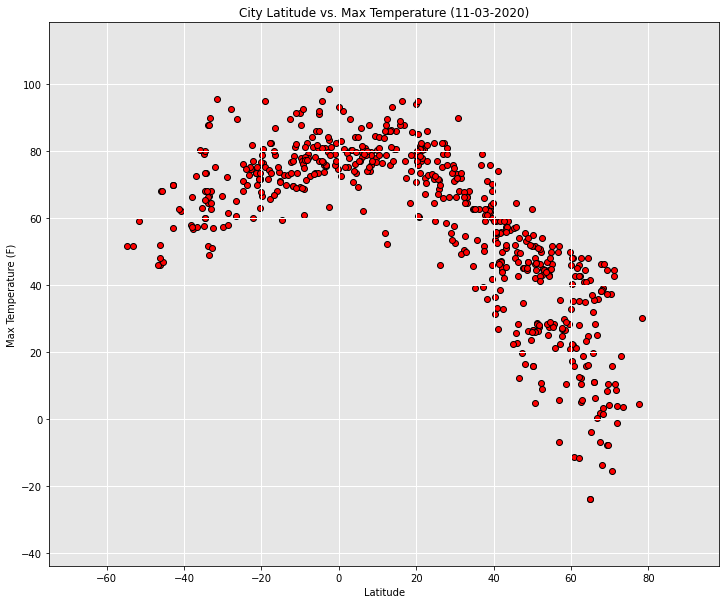

In [34]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Temperature
plt.scatter(city_data['Lat'], city_data['Max Temp'], c = 'red', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Max Temp'])-20, max(city_data['Max Temp'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Export as PNG
plt.savefig("figure1.png")

#Display Graph
plt.show()

#### Latitude vs. Humidity Plot

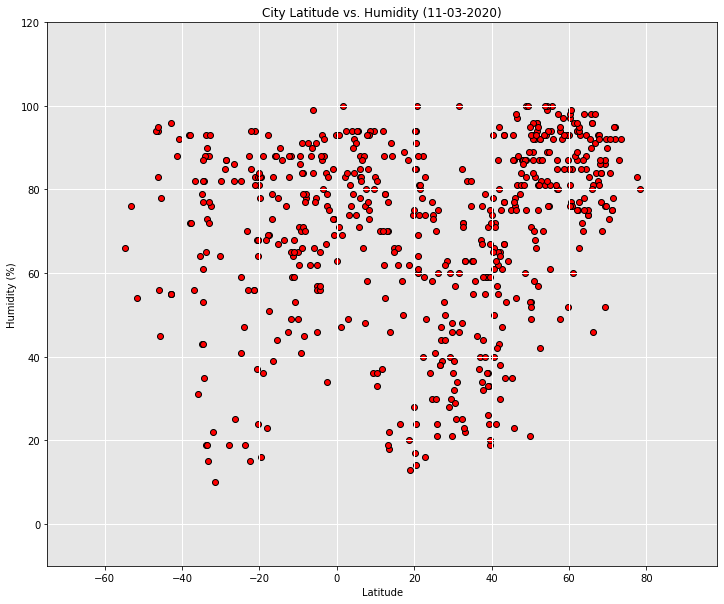

In [35]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Humidity
plt.scatter(city_data['Lat'], city_data['Humidity'], c = 'red', edgecolors = 'black')

#Add x-axis and y-axis label and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Humidity'])-20, max(city_data['Humidity'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Export as PNG
plt.savefig("figure2.png")

#Display Graph
plt.show()

#### Latitude vs. Cloudiness Plot

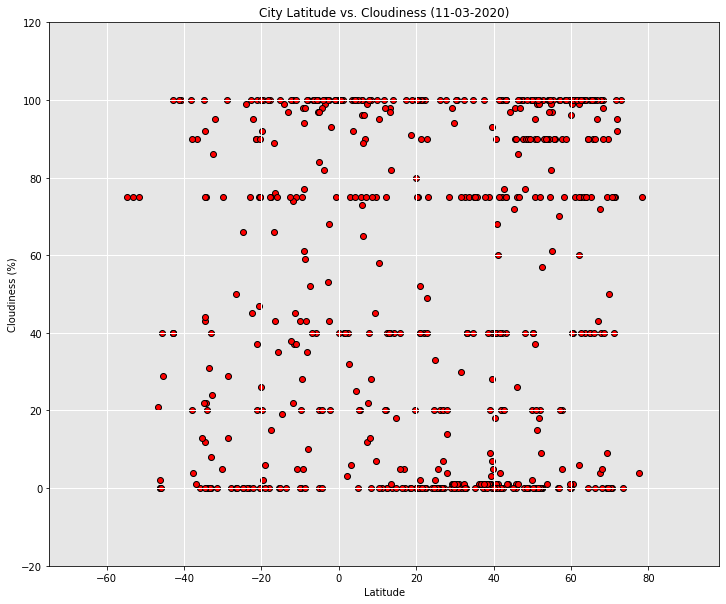

In [36]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Cloudiness
plt.scatter(city_data['Lat'], city_data['Cloudiness'], c = 'red', edgecolors = 'black')

#Add x-axis and y-axis label and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Cloudiness'])-20, max(city_data['Cloudiness'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Export as PNG
plt.savefig("figure3.png")

#Display Graph
plt.show()

#### Latitude vs. Wind Speed Plot

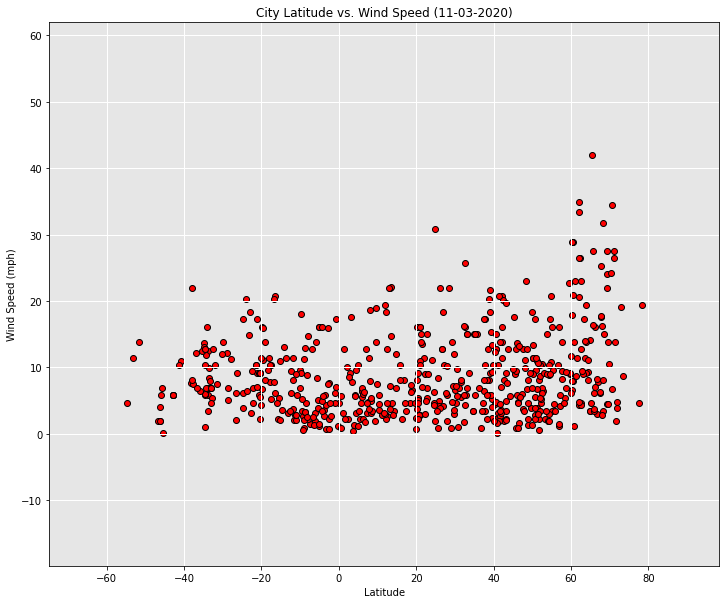

In [37]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Wind Speed
plt.scatter(city_data['Lat'], city_data['Wind Speed'], c = 'red', edgecolors = 'black')

#Add x-axis and y-axis label and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Wind Speed'])-20, max(city_data['Wind Speed'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Set plot size
plt.plot(figsize = (50,50))

#Export as PNG
plt.savefig("figure4.png")

#Display Graph
plt.show()

In [10]:
#Observations
#(1) Cities closer to the equation have a higher max temperature, we can see that the farther we move
# away from the latitude the temperature decrease whereas the temperature increase as we get close to latitude 
#(2) From latitude 60-80, the majority of the cities have a higher humidity %
#(3) From observation, cloudiness does not seem to have a relationship with latitude since no matter the latitude
# the cloudiness percentage ranges from 0-100
#(4) Majority of the cities' windspeed seem to ranges form 0-20 mph. As we move away from the equator, there seem 
# to be some cities with cases of higher wind speed (mph)